<a href="https://colab.research.google.com/github/abigailhtp/Blaze-Praktikum-ML/blob/main/praktikum_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Miriam Stefani A.Hutapea <br>
NIM : 24060122130051 <br>
Deskripsi: Evaluasi algoritma dengan menggunakan 3 model, yaitu kNN, SVM ,dan Naive Bayes

<b>1. Import library yang dibutuhkan untuk pemrosesan data </b>

In [20]:
import pandas
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import pair_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<b>2. Memuat dataset iris yang terdapat di url </b>

In [21]:
url= "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names=['sepal-length','sepal-width','petal-length','petal-width','class']
dataset=pandas.read_csv(url,names=names)

In [3]:
print(dataset.shape)

(150, 5)


In [4]:
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [5]:
print(dataset.groupby('class').size() )

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [6]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


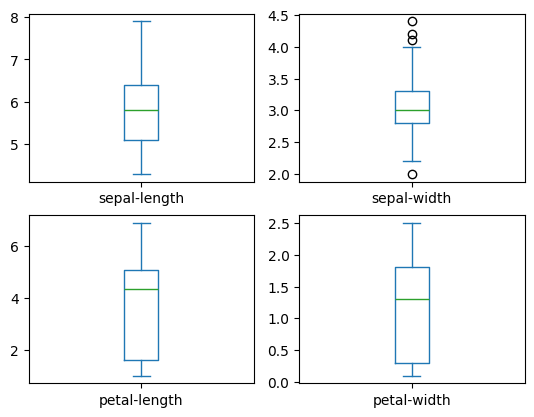

In [7]:
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False, sharey=False)
plt.show()

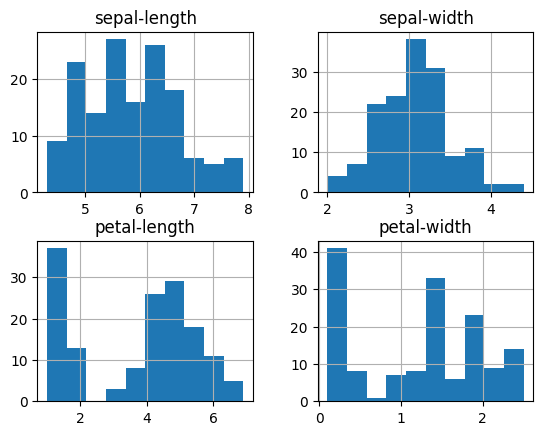

In [8]:
dataset.hist()
plt.show()

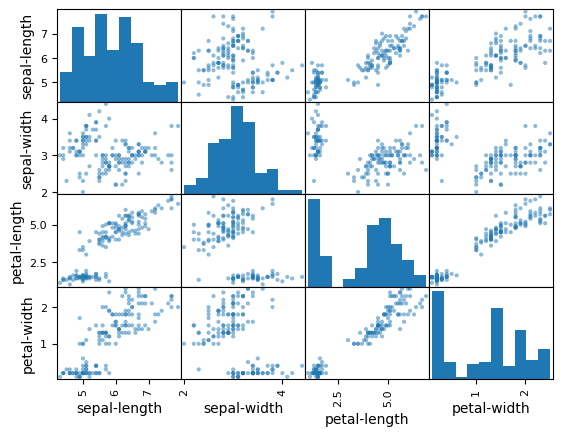

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plt.show()

<b>3. Membagi dataset menjadi 80:20 (80 untuk training, 20 untuk validasi) </b>

In [22]:

#split-out validasi dataset
array=dataset.values
X=array[:,0:4]
Y=array[:,4]
validation_size=0.20
seed=7 #menggerakkan seed, biasanya 0,1,7,4,2 biar ketika dirun sama
X_train,X_validation,Y_train,Y_validation= model_selection.train_test_split(X,Y,test_size=validation_size, random_state=seed)

In [23]:
#test options and evaluation metric
seed=7
scoring='accuracy'

<b>4.Membangun model dan memilih model terbaik </b>

In [24]:
#spot check algorithms
models=[]
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

#evaluate each model in turn
result=[]
names=[]
for name,model in models:
  kfold=model_selection.KFold(n_splits=10,random_state=seed, shuffle=True)
  cv_results=model_selection.cross_val_score(model,X_train,Y_train, cv=kfold, scoring=scoring)
  result.append(cv_results)
  names.append(name)
  msg="%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
  print(msg)

KNN: 0.983333 (0.033333)
NB: 0.966667 (0.040825)
SVM: 0.983333 (0.033333)


cv_result.mean() digunakan untuk menghitung rata-rata dari nilai evaluasi. cv_result.std() digunakan untuk menghitung simpangan baku dari nilai evaluasi. Nilai kecil dari std() menunjukkan bahwa model memiliki performa yang konsisten di berbagai fold. <br>

Didapati bahwa model yang paling akurat yaitu SVM. Kemudian dilakukan fit training model terhadap data dengan menggunakan SVM.
<br>

Setelah itu dihitung precision, recall, f1-score serta dihitung akurasi dengan menggunakan macro average dan micro average.

In [25]:
#fit training model
svm=SVC()
svm.fit(X_train, Y_train)
Y_predictions=svm.predict(X_validation)
print(f'accuracy score:{accuracy_score(Y_validation,Y_predictions)}')
cm=confusion_matrix(Y_validation,Y_predictions)
print(cm)
print(classification_report(Y_validation, Y_predictions))

accuracy score:0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



Kemudian dilakukan visualisasi confusion matrix dari metode SVM. Nilai true positive dari metode ini adalah sebesar 25.

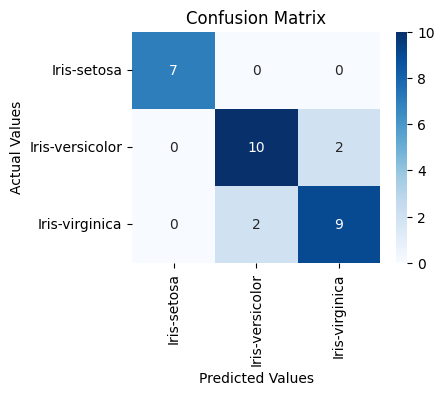

In [26]:
import pandas as pd
classes=np.unique(Y_train)
cm_df=pd.DataFrame(cm,index=classes,columns=classes)

plt.figure(figsize=(4,3))
sns.heatmap(cm_df,annot=True, fmt="d",cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

<b>Tugas Praktikum</b>

<b>1. k- Nearest Neighbor (kNN)</b>

In [27]:
#Fit Training Model
knn=KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_predictions=knn.predict(X_validation)
print(f'accuracy score:{accuracy_score(Y_validation,Y_predictions)}')
cm=confusion_matrix(Y_validation,Y_predictions)
print(cm)
print(classification_report(Y_validation, Y_predictions))

accuracy score:0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



Untuk menguji dataset dengan mengguankan k-Nearest Neighbor, digunakan fungsi kNeighborsClassifier. Kemudian dilakukan fit training model dan didapati bahwa nilai akurasi dari model ini adalah 0.9.

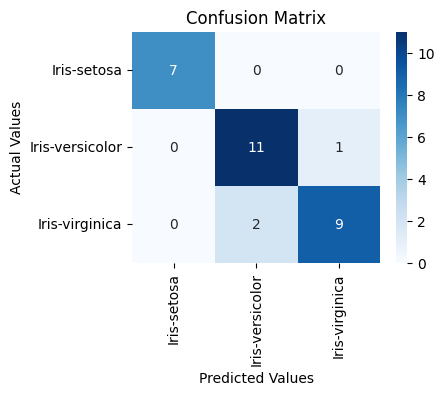

In [28]:
import pandas as pd
classes=np.unique(Y_train)
cm_df=pd.DataFrame(cm,index=classes,columns=classes)

plt.figure(figsize=(4,3))
sns.heatmap(cm_df,annot=True, fmt="d",cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Setelah dilakukan visualisasi, nilai true positive dari model ini adalah 27

<b>2. Gaussian Naive Bayes (NB)</b>

In [29]:
#Fit Training Model
gnb=GaussianNB()
gnb.fit(X_train, Y_train)
Y_predictions=gnb.predict(X_validation)
print(f'accuracy score:{accuracy_score(Y_validation,Y_predictions)}')
cm=confusion_matrix(Y_validation,Y_predictions)
print(cm)
print(classification_report(Y_validation, Y_predictions))

accuracy score:0.8333333333333334
[[7 0 0]
 [0 9 3]
 [0 2 9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

       accuracy                           0.83        30
      macro avg       0.86      0.86      0.86        30
   weighted avg       0.84      0.83      0.83        30



Untuk menguji dataset dengan mengguankan Gaussian Naive-bayes, digunakan fungsi GaussianNB. Kemudian dilakukan fit training model dan didapati bahwa nilai akurasi dari model ini adalah 0.833.

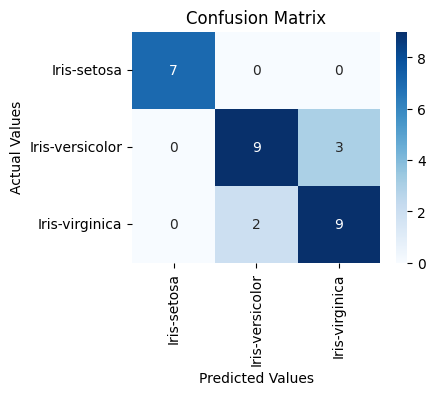

In [30]:
import pandas as pd
classes=np.unique(Y_train)
cm_df=pd.DataFrame(cm,index=classes,columns=classes)

plt.figure(figsize=(4,3))
sns.heatmap(cm_df,annot=True, fmt="d",cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Nilai true positive dari metode Naive Bayes ini yaitu 25.

<b> Evaluasi </b> <br>
Evaluasi dari ketiga algoritma ini yaitu: <br>
1. Terdapat perubahan hasil mean dan standard dari cross validation. (hal ini belum pasti diketahui mengapa karena praktikan tidak melakukan perubahan apapun setelah praktikum) Sehingga menyebabkan yang awalnya model SVM memiliki nilai akurasi paling besar (berdasarkan cross validation), kini model SVM dan KNN memiliki nilai akurasi yang sama besar. <br>

2. Setelah dilakukan pemrosesan didapati model kNN memiliki akurasi paling tinggi diantara ketiganya, yaitu 0.9 dengan macro average precision 0.92 dan weighted average 0.90.


